In [10]:
import sys
sys.path.append("../")

In [11]:
import numpy as np
import random
from typing import Tuple, Dict
from collections import defaultdict
from ds4400_final_project.dataset.common import train_and_evaluate_classifier, print_classifier_results, get_best_test_result, get_title_from_filename
from ds4400_final_project.dataset.common_plotting import plot_param_comparison_per_dataset
from ds4400_final_project.dataset.load_gtzan import load_data_from_file
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [12]:
# import the data from the 3 seconds and 30 seconds features CSV
X_3, y_3, index_genre_map_3, genre_index_map_3 = load_data_from_file("features_3_sec.csv")
X_30, y_30, index_genre_map_30, genre_index_map_30 = load_data_from_file("features_30_sec.csv")

In [13]:
# split all the data into training, validation and testing sets
TEST_SIZE = 0.20
VAL_SIZE = 0.25
RANDOM_STATE = 42

random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

x_3_train, x_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=TEST_SIZE, random_state=RANDOM_STATE)
x_30_train, x_30_test, y_30_train, y_30_test = train_test_split(X_30, y_30, test_size=TEST_SIZE, random_state=RANDOM_STATE)
x_3_train, x_3_val, y_3_train, y_3_val = train_test_split(x_3_train, y_3_train, test_size=VAL_SIZE, random_state=RANDOM_STATE)
x_30_train, x_30_val, y_30_train, y_30_val = train_test_split(x_30_train, y_30_train, test_size=VAL_SIZE, random_state=RANDOM_STATE)

In [14]:
# list of all kernels to try
kernels = ["linear", "poly", "rbf", "sigmoid"]
# list of all datasets to try
csv_files = {
	"features_3_sec.csv": [x_3_train, x_3_val, x_3_test, y_3_train, y_3_val, y_3_test, index_genre_map_3, genre_index_map_3],
	"features_30_sec.csv": [x_30_train, x_30_val, x_30_test, y_30_train, y_30_val, y_30_test, index_genre_map_30, genre_index_map_30]
}

# { CSV_FILENAME: { SOLVER: ( TRAIN_ACC, TEST_ACC, FAILED_COUNT ) }
results: Dict[str, Dict[str, Tuple]] = defaultdict(dict)

# iterate over all solvers
for kernel in kernels:
	# iterate over all datasets
	for filename in csv_files.keys():
		# construct the model
		classifier = SVC(kernel=kernel)

		x_train, x_val, x_test, y_train, y_val, y_test, index_genre_map, genre_index_map = csv_files[filename]
		# train and evaluate the model
		train_acc, val_acc, test_acc, failed_count = train_and_evaluate_classifier(
			classifier,
			X_train=x_train,
			y_train=y_train,
			X_val=x_val,
			y_val=y_val,
			X_test=x_test,
			y_test=y_test,
			index_genre_map=index_genre_map,
			genre_index_map=genre_index_map
		)
		results[filename][kernel] = (train_acc, val_acc, test_acc, failed_count)

In [15]:
# print all results from all models
for filename, result in results.items():
	for kernel, (train_acc, val_acc, test_acc, failed_count) in result.items():
		title = get_title_from_filename(filename)
		print_classifier_results(f"{title} ({kernel})", train_acc, val_acc, test_acc, failed_count)

Features 3 Sec (linear)
Train accuracy: 81.15%
Train error:    18.85%
Train accuracy: 75.88%
Train error:    24.12%
Test accuracy:  76.68%
Test error:     23.32%

| #   | Genre      | # of Incorrect | % of All Incorrect |
| --- |    ---     |      ---       |        ---         |
| 01  | ROCK       | 432            | 20.8%              |
| 02  | REGGAE     | 307            | 14.8%              |
| 03  | COUNTRY    | 277            | 13.3%              |
| 04  | DISCO      | 258            | 12.4%              |
| 05  | HIPHOP     | 256            | 12.3%              |
| 06  | BLUES      | 154            | 7.4%               |
| 07  | POP        | 139            | 6.7%               |
| 08  | JAZZ       | 128            | 6.2%               |
| 09  | METAL      | 94             | 4.5%               |
| 10  | CLASSICAL  | 33             | 1.6%               |
Features 3 Sec (poly)
Train accuracy: 87.12%
Train error:    12.88%
Train accuracy: 77.48%
Train error:    22.52%
Test accuracy: 

In [16]:
# print the results from the model with the best validation accuracy
filename, kernel, (train_acc, val_acc, test_acc, failed_count) = get_best_test_result(results)
title = get_title_from_filename(filename)
print_classifier_results(f"Best Validation Result: {title} ({kernel})", train_acc, val_acc, test_acc, failed_count)

Best Validation Result: Features 3 Sec (linear)
Train accuracy: 91.71%
Train error:    8.29%
Train accuracy: 83.73%
Train error:    16.27%
Test accuracy:  85.29%
Test error:     14.71%

| #   | Genre      | # of Incorrect | % of All Incorrect |
| --- |    ---     |      ---       |        ---         |
| 01  | ROCK       | 226            | 20.3%              |
| 02  | HIPHOP     | 137            | 12.3%              |
| 03  | COUNTRY    | 136            | 12.2%              |
| 04  | DISCO      | 133            | 11.9%              |
| 05  | REGGAE     | 131            | 11.7%              |
| 06  | POP        | 95             | 8.5%               |
| 07  | BLUES      | 94             | 8.4%               |
| 08  | JAZZ       | 90             | 8.1%               |
| 09  | METAL      | 50             | 4.5%               |
| 10  | CLASSICAL  | 24             | 2.2%               |


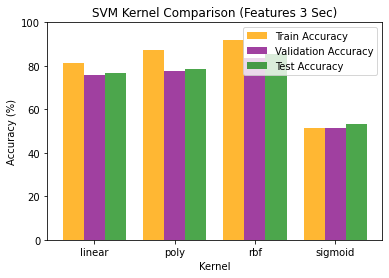

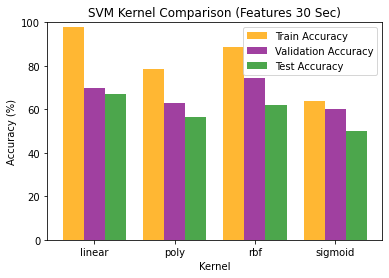

In [17]:
plot_param_comparison_per_dataset("SVM Kernel Comparison", "Kernel", results)